<a href="https://colab.research.google.com/github/lorettarehm/AIML/blob/main/LR_Capstone_SalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and load files

In [ ]:
# Examine the datasets available on the folder datasets, looking for their shape
# and structure, and look out for any outlier

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Define path for input files
datasets_path = os.path.abspath('/content/drive/MyDrive/AIML/CAPSTONE/datasets')
print(os.listdir(datasets_path))

['items.csv', 'sales.csv', 'restaurants.csv', '.ipynb_checkpoints']


In [ ]:
# Read file items.csv inside variable items and run function analyze_dataset
items = pd.read_csv(os.path.join(datasets_path, 'items.csv'))

In [ ]:
# Read file restaurants.csv inside variable items and run function analyze_dataset
restaurants = pd.read_csv(os.path.join(datasets_path, 'restaurants.csv'))

In [ ]:
# Read file sales.csv inside variable items and run function analyze_dataset
sales = pd.read_csv(os.path.join(datasets_path, 'sales.csv'))

# First analysis of datasets

In [ ]:
# Define function for first analysis
def analyze_dataset(filename, df):
  print(f"--- {filename} ---")
  print("Shape:", df.shape)
  print("\nData types:")
  print(df.dtypes)
  print("\nDescriptive Statistics:")
  print(df.describe())

  # If there are missing values, print them
  if df.isnull().sum().sum() > 0:
    print("\nMissing values:")
    print(df.isnull().sum())

  # If there are duplicated rows, print them
  if df.duplicated().sum() > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])

  # Outlier detection (using boxplots for numerical columns)
  numerical_cols = df.select_dtypes(include=['number']).columns
  for col in numerical_cols:

    # If column is id
    if col == 'id':
      # If there are duplicated values, print them
      if df[col].nunique() != len(df):
        print(f"Column {col} has duplicate values: \n{df[df.duplicated(subset=[col])]}")

    # Plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} in {filename}")
    plt.show()

    # Further outlier examination using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
      print(f"Outliers in {col}: \n{outliers}")

--- items.csv ---
Shape: (100, 5)

Data types:
id            int64
store_id      int64
name         object
kcal          int64
cost        float64
dtype: object

Descriptive Statistics:
               id    store_id         kcal        cost
count  100.000000  100.000000   100.000000  100.000000
mean    50.500000    3.520000   536.730000   11.763700
std     29.011492    1.708446   202.212852    8.991254
min      1.000000    1.000000    78.000000    1.390000
25%     25.750000    2.000000   406.250000    5.280000
50%     50.500000    4.000000   572.500000    7.625000
75%     75.250000    5.000000   638.250000   18.790000
max    100.000000    6.000000  1023.000000   53.980000


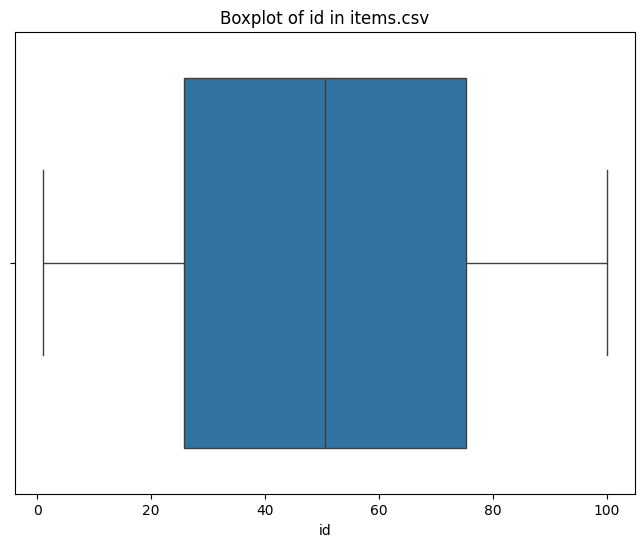

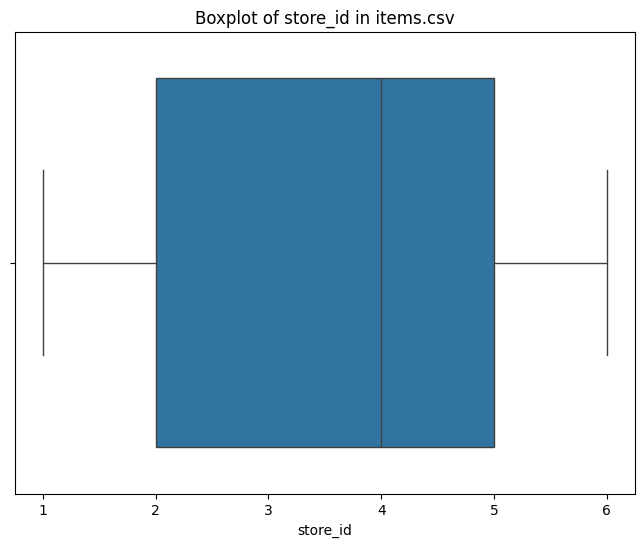

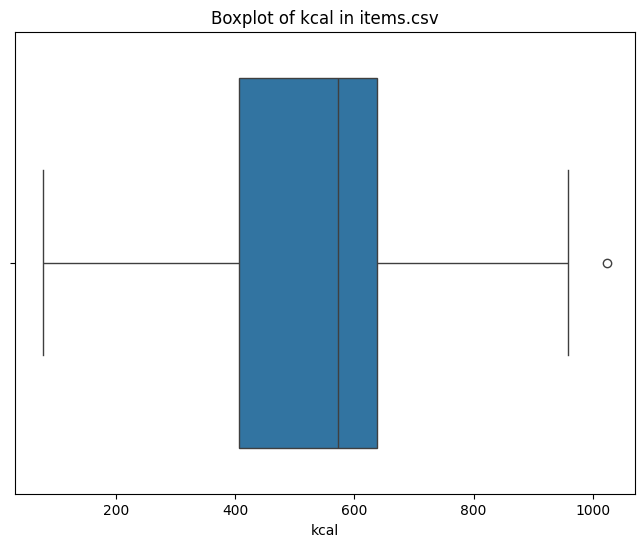

Outliers in kcal: 
    id  store_id                                          name  kcal  cost
32  33         6  Original Breaded Pork with Vegetables Dinner  1023  20.8


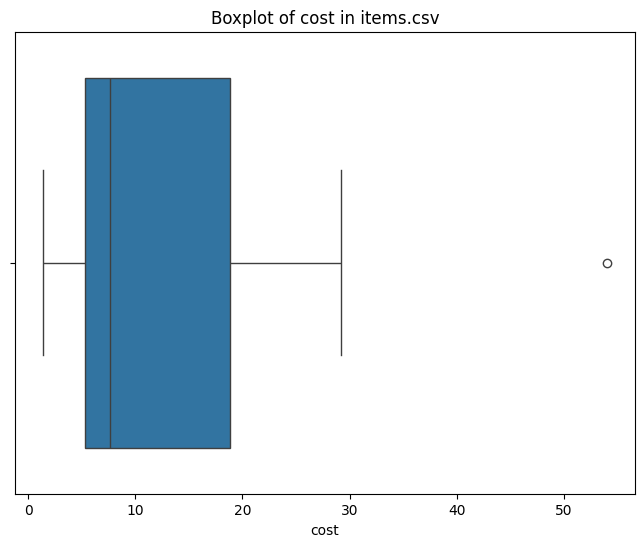

Outliers in cost: 
    id  store_id                           name  kcal   cost
79  80         4  Blue Ribbon Fruity Vegi Lunch   881  53.98


In [ ]:
analyze_dataset('items.csv', items)

In [ ]:
# Check if there are duplicated values in the column name and display ordered by name
items[items.duplicated(subset=('name'),keep=False)].sort_values(by='name')

,id,store_id,name,kcal,cost
41,42,2,Fantastic Milky Smoothy,318,2.91
80,81,3,Fantastic Milky Smoothy,383,5.11
15,16,1,Frozen Milky Smoothy,284,3.21
70,71,5,Frozen Milky Smoothy,211,3.98
40,41,4,Milky Cake,624,6.01
72,73,1,Milky Cake,596,5.16
86,87,5,Milky Cake,627,7.22
71,72,4,Original Milky Cake,602,6.53
85,86,3,Original Milky Cake,595,6.50
51,52,3,Original Sweet Milky Soft Drink,535,5.68


--- restaurants.csv ---
Shape: (6, 2)

Data types:
id       int64
name    object
dtype: object

Descriptive Statistics:
             id
count  6.000000
mean   3.500000
std    1.870829
min    1.000000
25%    2.250000
50%    3.500000
75%    4.750000
max    6.000000


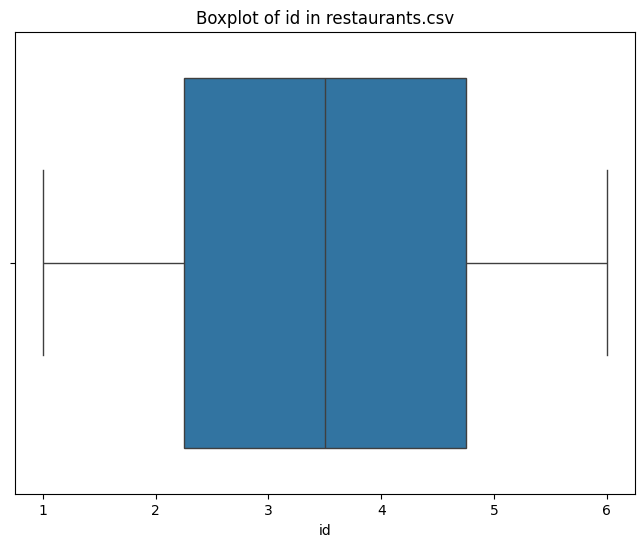

In [ ]:
analyze_dataset('restaurants.csv', restaurants)

--- sales.csv ---
Shape: (109600, 4)

Data types:
date           object
item_id         int64
price         float64
item_count    float64
dtype: object

Descriptive Statistics:
             item_id          price     item_count
count  109600.000000  109600.000000  109600.000000
mean       50.500000      11.763700       6.339297
std        28.866202       8.946225      30.003728
min         1.000000       1.390000       0.000000
25%        25.750000       5.280000       0.000000
50%        50.500000       7.625000       0.000000
75%        75.250000      18.790000       0.000000
max       100.000000      53.980000     570.000000


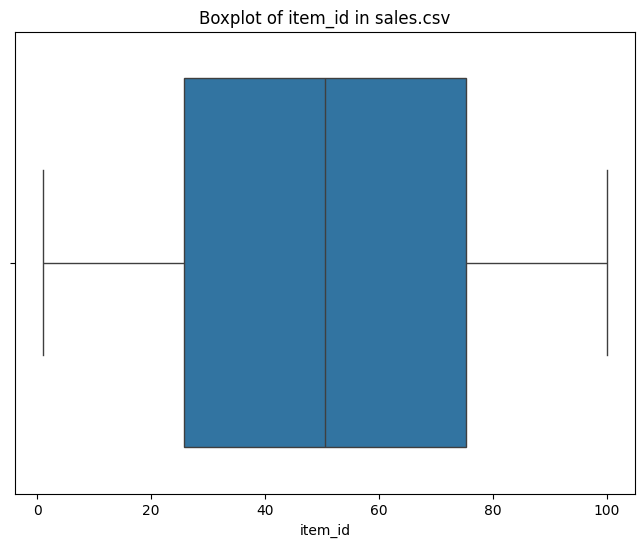

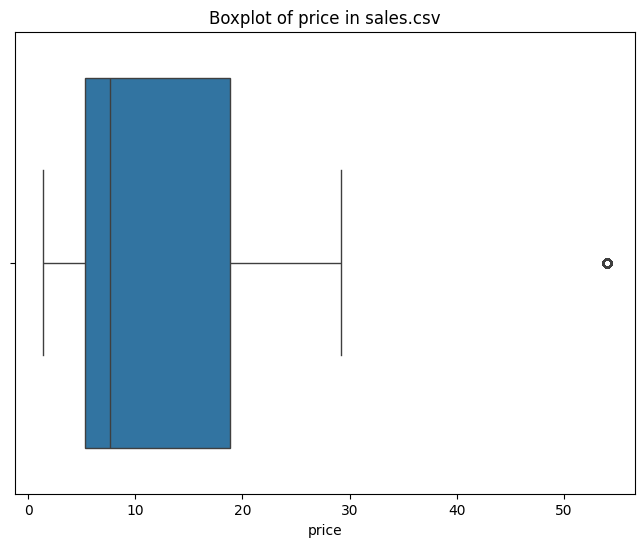

Outliers in price: 
              date  item_id  price  item_count
82      2019-01-01       80  53.98         0.0
115     2019-01-02       80  53.98         2.0
216     2019-01-03       80  53.98         2.0
316     2019-01-04       80  53.98         1.0
482     2019-01-05       80  53.98         0.0
...            ...      ...    ...         ...
109119  2021-12-27       80  53.98         1.0
109280  2021-12-28       80  53.98         0.0
109379  2021-12-29       80  53.98         0.0
109480  2021-12-30       80  53.98         0.0
109580  2021-12-31       80  53.98         0.0

[1096 rows x 4 columns]


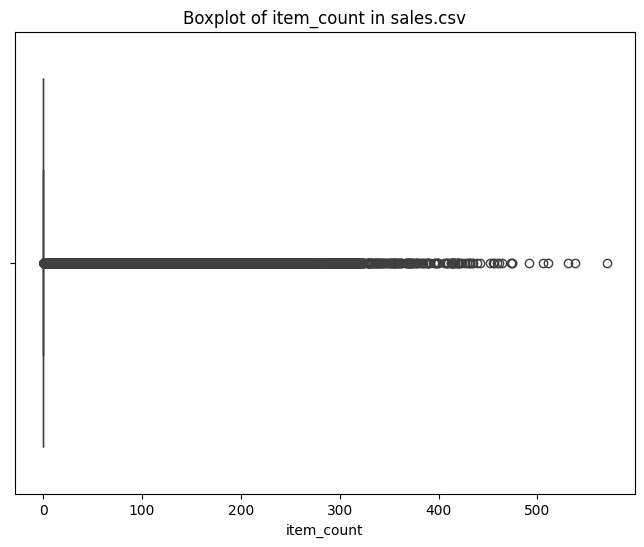

Outliers in item_count: 
              date  item_id  price  item_count
0       2019-01-01        3  29.22         2.0
1       2019-01-01        4  26.42        22.0
2       2019-01-01       12   4.87         7.0
3       2019-01-01       13   4.18        12.0
4       2019-01-01       16   3.21       136.0
...            ...      ...    ...         ...
109517  2021-12-31       67   7.00         6.0
109518  2021-12-31       68   8.70         1.0
109519  2021-12-31       73   5.16        10.0
109520  2021-12-31       76  17.93        70.0
109521  2021-12-31       90   7.71         3.0

[23484 rows x 4 columns]


In [ ]:
analyze_dataset('sales.csv', sales)

In [ ]:
# Check how many rows have decimal value > 0 in the item_count column
decimal_rows = sales[sales['item_count'] % 1 != 0]
print("Rows with decimal values in item_count:", decimal_rows)

Rows with decimal values in item_count: Empty DataFrame
Columns: [date, item_id, price, item_count]
Index: []


DataFrame after removing rows with item_count = 0:
               date  item_id  price  item_count
0       2019-01-01        3  29.22           2
1       2019-01-01        4  26.42          22
2       2019-01-01       12   4.87           7
3       2019-01-01       13   4.18          12
4       2019-01-01       16   3.21         136
...            ...      ...    ...         ...
109517  2021-12-31       67   7.00           6
109518  2021-12-31       68   8.70           1
109519  2021-12-31       73   5.16          10
109520  2021-12-31       76  17.93          70
109521  2021-12-31       90   7.71           3

[23484 rows x 4 columns]
--- sales_filtered ---
Shape: (23484, 4)

Data types:
date           object
item_id         int64
price         float64
item_count      int64
dtype: object

Descriptive Statistics:
            item_id         price    item_count
count  23484.000000  23484.000000  23484.000000
mean      42.959547     13.090008     29.585548
std       27.891002     10.461442

<ipython-input-16-30c4d913deef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_filtered['item_count'] = sales_filtered['item_count'].astype(int)


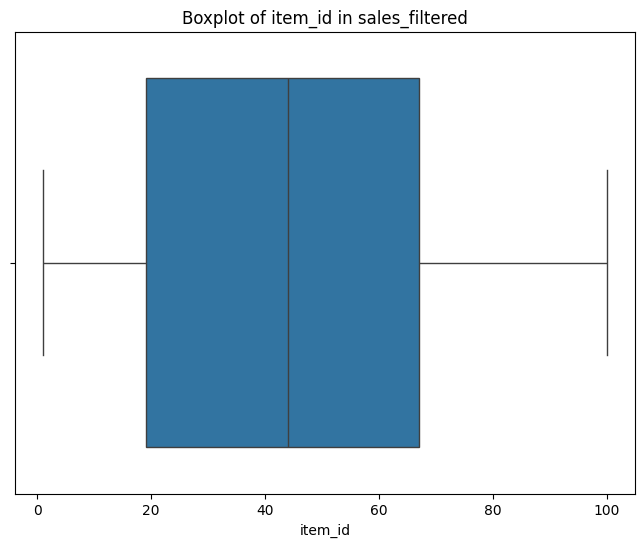

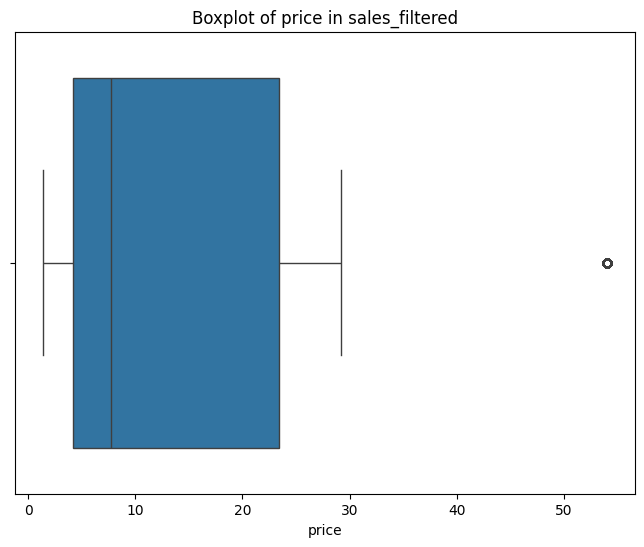

Outliers in price: 
              date  item_id  price  item_count
115     2019-01-02       80  53.98           2
216     2019-01-03       80  53.98           2
316     2019-01-04       80  53.98           1
715     2019-01-08       80  53.98           1
1217    2019-01-13       80  53.98           1
...            ...      ...    ...         ...
107720  2021-12-13       80  53.98           2
108320  2021-12-19       80  53.98           1
108519  2021-12-21       80  53.98           1
108921  2021-12-25       80  53.98           2
109119  2021-12-27       80  53.98           1

[269 rows x 4 columns]


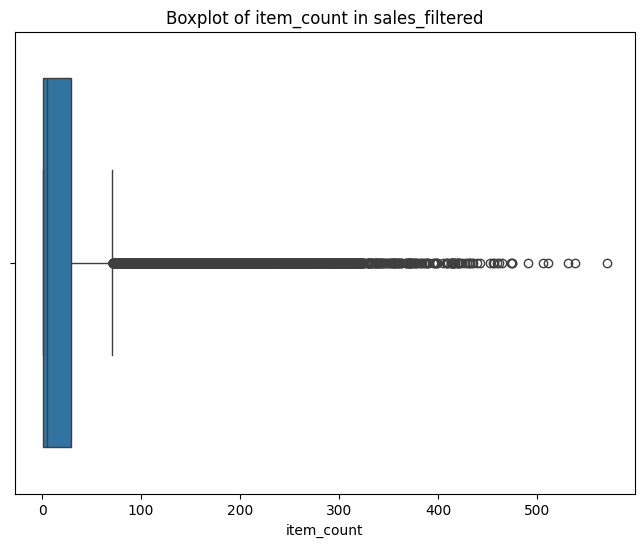

Outliers in item_count: 
              date  item_id  price  item_count
4       2019-01-01       16   3.21         136
5       2019-01-01       19   2.89         108
103     2019-01-02       16   3.21         110
104     2019-01-02       19   2.89          94
203     2019-01-03       16   3.21         144
...            ...      ...    ...         ...
109406  2021-12-30       19   2.89         186
109409  2021-12-30       38  10.80          74
109502  2021-12-31        9   3.91          85
109506  2021-12-31       19   2.89         301
109512  2021-12-31       38  10.80         119

[2595 rows x 4 columns]


In [ ]:
# Check item_count column on sales file and remove lines where item_count = 0
sales_filtered = sales[sales['item_count'] != 0]

# Convert count column in integer format
sales_filtered['item_count'] = sales_filtered['item_count'].astype(int)

# Display the updated DataFrame
print("DataFrame after removing rows with item_count = 0:\n", sales_filtered)

# Run function analyze_dataset on sales_filtered
analyze_dataset('sales_filtered', sales_filtered)

In [ ]:
# prompt: Merge the datasets into a single dataset that includes the date, item id, price, item count, item
# names, kcal values, store id, and store name

# Merge the datasets
merged_df = pd.merge(sales_filtered, items, left_on='item_id', right_on='id', how='left')
merged_df = pd.merge(merged_df, restaurants, left_on='store_id', right_on='id', how='left')

# Display the merged dataset
merged_df.head()

# Remove id_x, id_y and cost columns
merged_df.drop(columns=['id_x', 'id_y', 'cost'], inplace=True)

# Rename columns
merged_df.rename(columns={'name_x': 'item_name', 'name_y': 'store_name', 'price': 'unit_price'}, inplace=True)

# Calculate final sale value = unit_price * item_count
merged_df['sale_value'] = merged_df['unit_price'] * merged_df['item_count']

merged_df.head()


,date,item_id,unit_price,item_count,store_id,item_name,kcal,store_name,sale_value
0,2019-01-01,3,29.22,2,1,Sweet Fruity Cake,931,Bob's Diner,58.44
1,2019-01-01,4,26.42,22,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24
2,2019-01-01,12,4.87,7,1,Fantastic Sweet Cola,478,Bob's Diner,34.09
3,2019-01-01,13,4.18,12,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16
4,2019-01-01,16,3.21,136,1,Frozen Milky Smoothy,284,Bob's Diner,436.56


# Exploratory data analysis

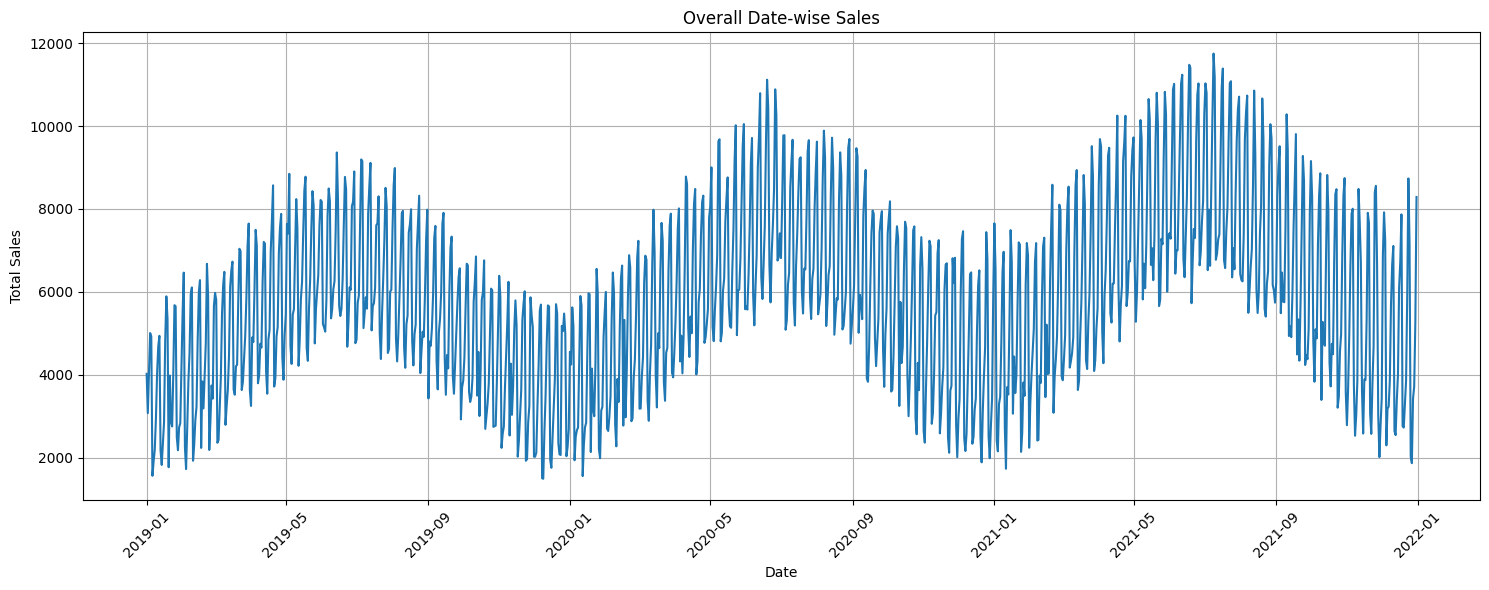

In [ ]:
# Convert 'date' column to datetime objects
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Group by date and sum the sale value for the day
daily_sales = merged_df.groupby('date')['sale_value'].sum()

# Plot the datewise sales
plt.figure(figsize=(15, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Overall Date-wise Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Extract the day of the week from the 'date' column
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek
merged_df.head()

,date,item_id,unit_price,item_count,store_id,item_name,kcal,store_name,sale_value,day_of_week
0,2019-01-01,3,29.22,2,1,Sweet Fruity Cake,931,Bob's Diner,58.44,1
1,2019-01-01,4,26.42,22,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,581.24,1
2,2019-01-01,12,4.87,7,1,Fantastic Sweet Cola,478,Bob's Diner,34.09,1
3,2019-01-01,13,4.18,12,1,Sweet Frozen Soft Drink,490,Bob's Diner,50.16,1
4,2019-01-01,16,3.21,136,1,Frozen Milky Smoothy,284,Bob's Diner,436.56,1


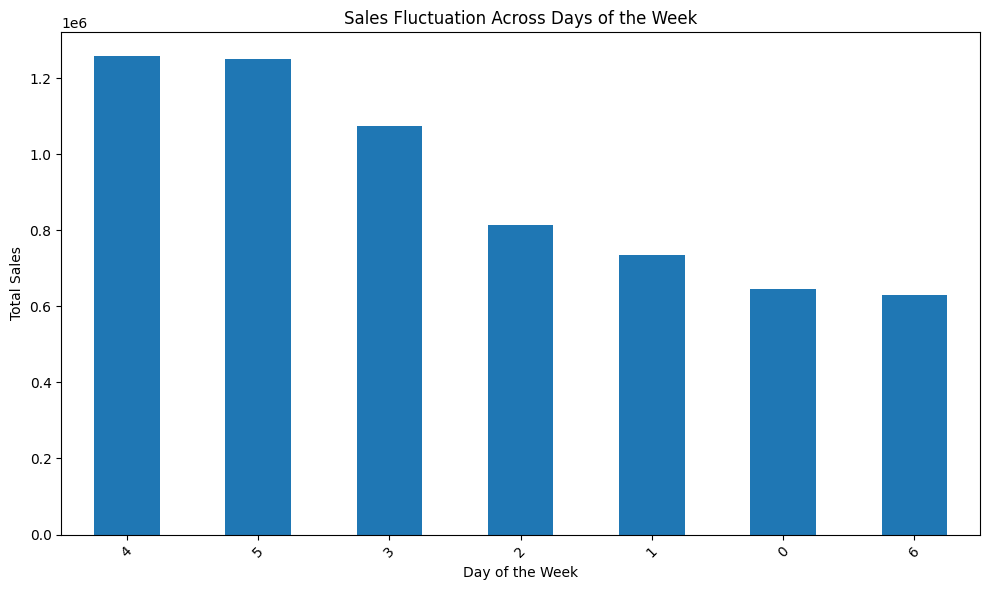

In [ ]:
# Group by day of the week and sum the sale_value
sales_by_day = merged_df.groupby('day_of_week')['sale_value'].sum()

# Order sales_by_day in descending order of sale_value
sales_by_day = sales_by_day.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.title('Sales Fluctuation Across Days of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

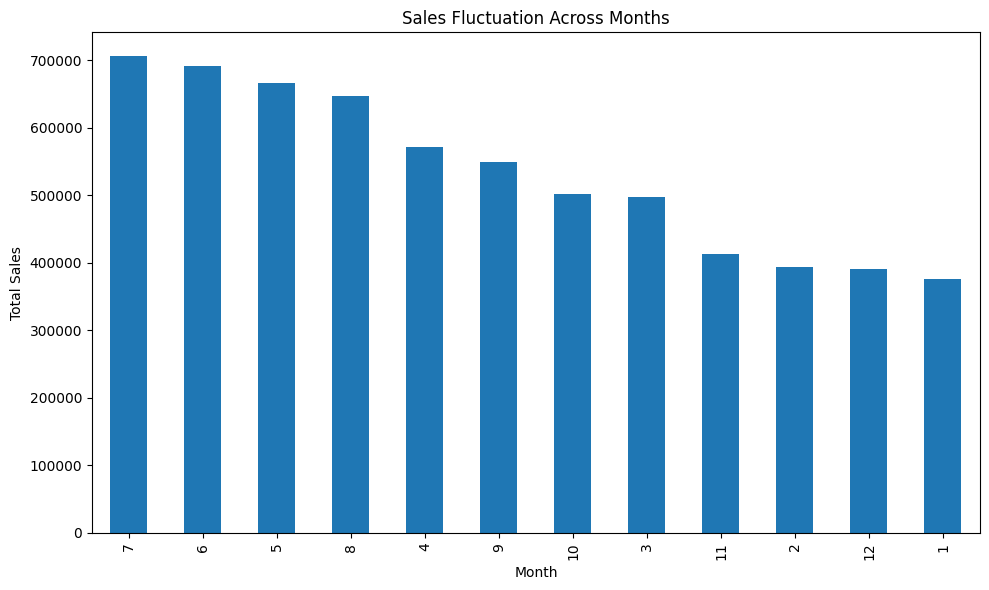

In [ ]:
# Import calendar module
import calendar

# Extract the month from the 'date' column
merged_df['month'] = merged_df['date'].dt.month

# Add column with month name
merged_df['month_name'] = merged_df['date'].dt.month.apply(lambda x: calendar.month_name[x])

# Group by month and sum the sale_value
sales_by_month = merged_df.groupby('month')['sale_value'].sum()

# Order sales_by_month in descending order of sale_value
sales_by_month = sales_by_month.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Fluctuation Across Months')
plt.tight_layout()
plt.show()

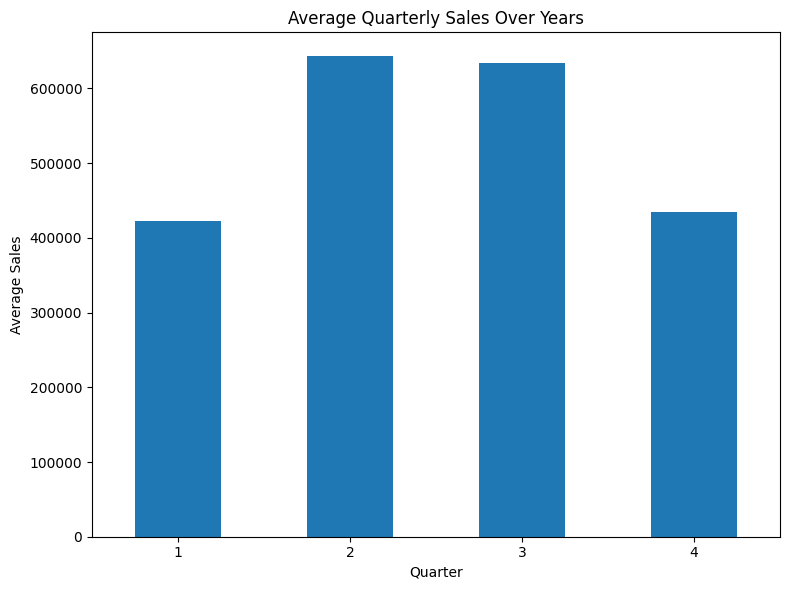

In [ ]:
# Extract the quarter from the 'date' column
merged_df['quarter'] = merged_df['date'].dt.quarter

# Extract the year from the 'date' column
merged_df['year'] = merged_df['date'].dt.year

# Group by quarter and year, then calculate the average sales for each quarter across all years
quarterly_sales = merged_df.groupby(['quarter', 'year'])['sale_value'].sum().unstack()

# Calculate the average sales for each quarter across all years
average_quarterly_sales = quarterly_sales.mean(axis=1)

# Plotting
plt.figure(figsize=(8, 6))
average_quarterly_sales.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')
plt.title('Average Quarterly Sales Over Years')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Group by restaurant name and sum sale_value to find total sales for each restaurant
sales_by_restaurant = merged_df.groupby('store_name')['sale_value'].sum()

# Print list of restaurants ordering by sales_value descending
print(sales_by_restaurant.sort_values(ascending=False))

store_name
Bob's Diner       6337275.69
Fou Cher            27885.37
Corner Cafe         16551.43
Surfs Up            15651.49
Beachfront Bar       3796.20
Sweet Shack          2578.27
Name: sale_value, dtype: float64


In [ ]:
merged_df.columns

Index(['date', 'item_id', 'unit_price', 'item_count', 'store_id', 'item_name',
       'kcal', 'store_name', 'sale_value', 'day_of_week', 'month',
       'month_name', 'quarter', 'year'],
      dtype='object')

In [ ]:
# Create a dataset without outliers
df_no_Outliers = merged_df[merged_df['store_id'] != 1] # Bob's Diner
df_no_Outliers = df_no_Outliers[df_no_Outliers['item_id'] != 80] # Blue Ribbon Fruity Vegi
#df_no_Outliers = merged_df
df_no_Outliers.head()

,date,item_id,unit_price,item_count,store_id,item_name,kcal,store_name,sale_value,day_of_week,month,month_name,quarter,year
8,2019-01-01,27,26.21,1,6,Steak Meal,607,Surfs Up,26.21,1,1,January,1,2019
9,2019-01-01,35,4.36,1,6,Blue Ribbon Cocktail,456,Surfs Up,4.36,1,1,January,1,2019
10,2019-01-01,42,2.91,1,2,Fantastic Milky Smoothy,318,Beachfront Bar,2.91,1,1,January,1,2019
16,2019-01-01,75,5.60,1,4,Blue Ribbon Milky Smoothy,459,Fou Cher,5.60,1,1,January,1,2019
19,2019-01-01,91,15.46,1,5,Halibut with Bread Dinner,468,Corner Cafe,15.46,1,1,January,1,2019


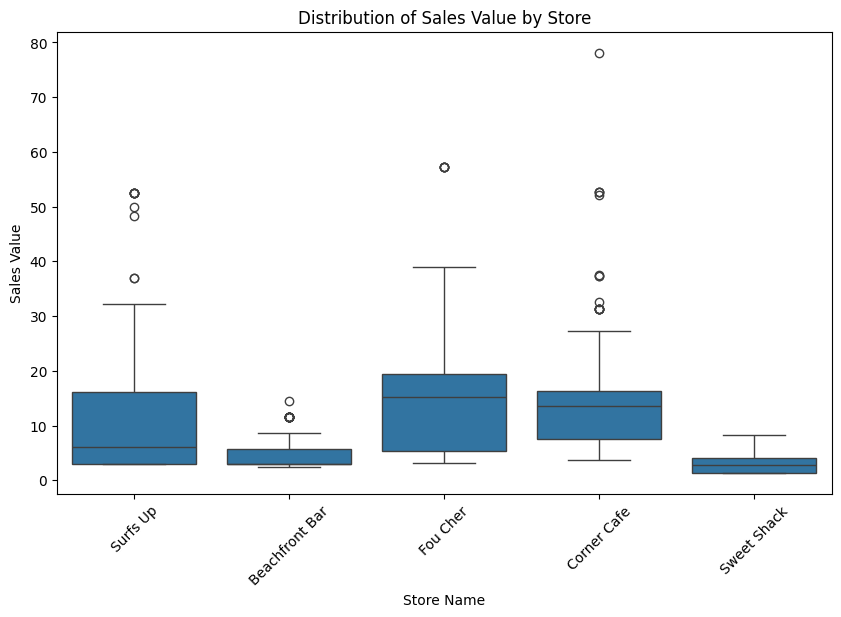

In [ ]:
# Distribution of Sales Value by Store

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='store_name', y='sale_value', data=df_no_Outliers)
plt.title('Distribution of Sales Value by Store')
plt.xlabel('Store Name')
plt.ylabel('Sales Value')
_ = plt.xticks(rotation=45)

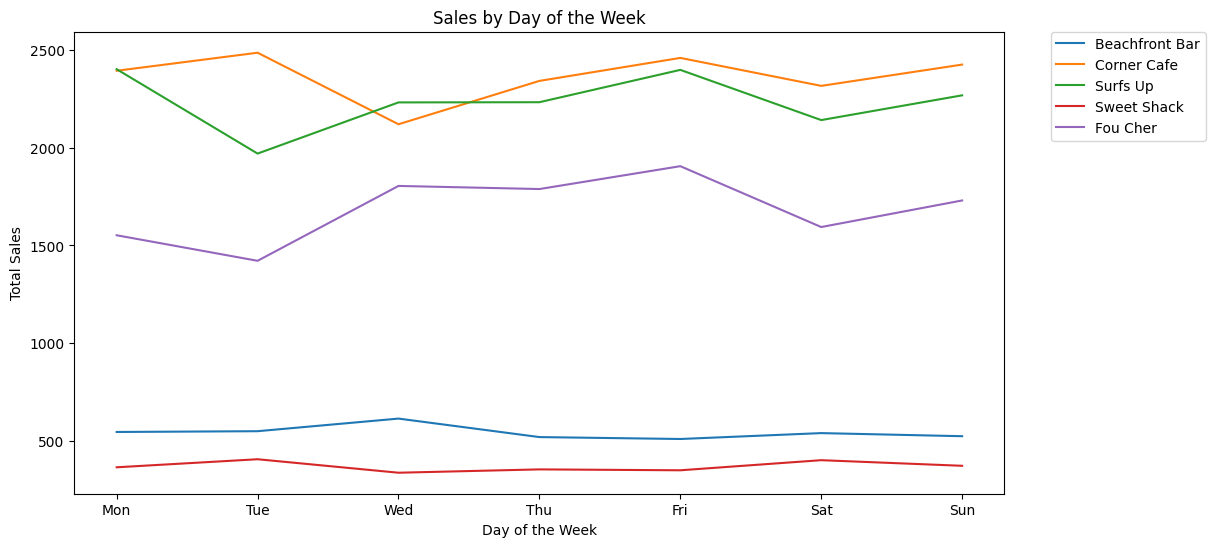

In [ ]:
# Plot sales_by_day using each store_name as hue
plt.figure(figsize=(12, 6))
# Order df_no_Outliers by day_of_week
df_no_Outliers = df_no_Outliers.sort_values(by='day_of_week')
sns.lineplot(x='day_of_week', y='sale_value', hue='store_name', data=df_no_Outliers, estimator=sum, errorbar=None)  # estimator=sum to aggregate sales for each day/store
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
# Plot legend on top right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Replace x axis labels with day_of_week_name
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

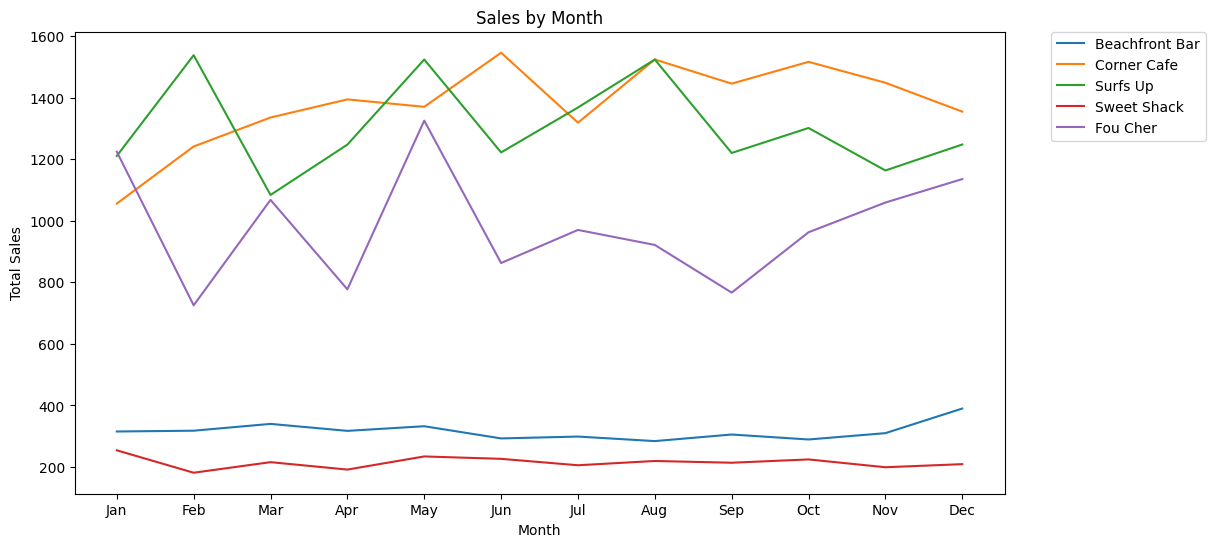

In [ ]:
# Plot sales_by_month using each store_name as hue
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='sale_value', hue='store_name', data=df_no_Outliers, estimator=sum, errorbar=None)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
# Plot legend on top right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Replace month number by corresponding names
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

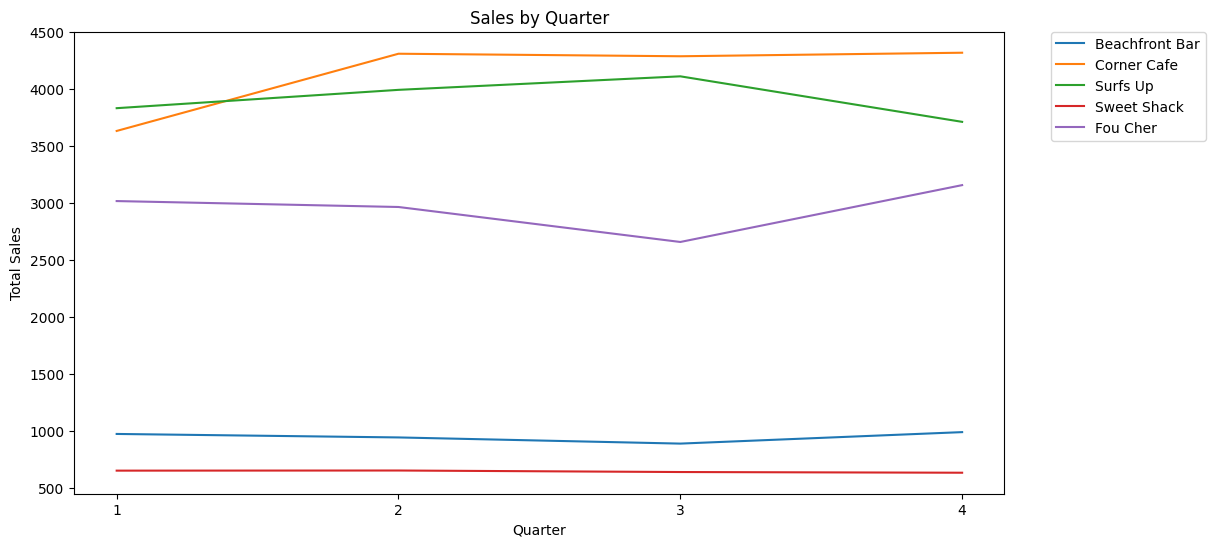

In [ ]:
# Plot average_quarterly_sales using each store_name as hue
plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter', y='sale_value', hue='store_name', data=df_no_Outliers, estimator=sum, errorbar=None)
plt.title('Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
# Plot legend on top right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# X axis only 4 quarters
plt.xticks(range(1, 5))
plt.show()

In [ ]:
# Distinct years on df_no_Outliers
df_no_Outliers['year'].unique()

array([2020, 2021, 2019], dtype=int32)

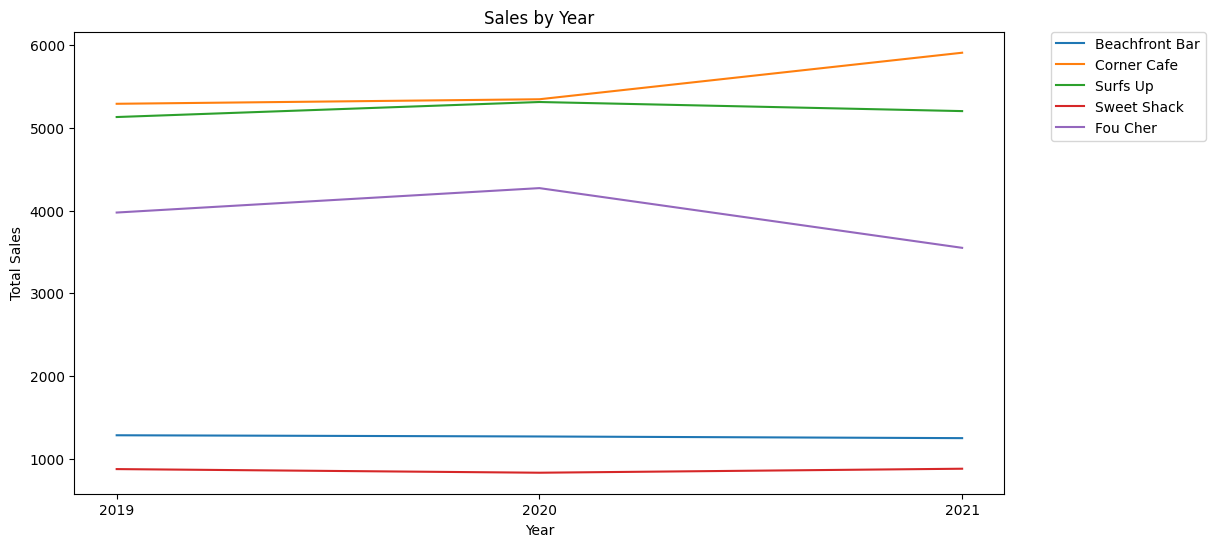

In [ ]:
# Plot restaurant sales accross years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sale_value', hue='store_name', data=df_no_Outliers, estimator=sum, errorbar=None)
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
# Plot legend on top right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# X Axis only 3 years
plt.xticks(range(2019, 2022))
plt.show()

# Machine Learning

In [ ]:
# Identify the most popular items overall by counting their occurrences and list them with corresponding store_name
popular_items = merged_df['item_name'].value_counts().head(10)
# Add store_name where the item is sold
popular_items_with_store = popular_items = pd.DataFrame({'item_name': popular_items.index, 'count': popular_items.values})
popular_items_with_store = pd.merge(popular_items_with_store, merged_df[['item_name', 'item_id', 'store_name']], on='item_name', how='left')
popular_items_with_store = popular_items_with_store.drop_duplicates()
popular_items_with_store.sort_values(by='count', ascending=False)
popular_items_with_store

,item_name,count,item_id,store_name
0,Sea Bass with Vegetables Dinner,1096,56,Bob's Diner
1096,Amazing Steak Dinner with Rolls,1096,4,Bob's Diner
2192,Strawberry Smoothy,1096,19,Bob's Diner
3288,Amazing pork lunch,1096,76,Bob's Diner
4384,Blue Ribbon Beef Entree,1096,59,Bob's Diner
5480,Sweet Frozen Soft Drink,1095,13,Bob's Diner
6575,Amazing Fish with Vegetables Meal,1094,21,Bob's Diner
7669,Sweet Lamb Cake,1088,67,Bob's Diner
8757,Fantastic Sweet Cola,1081,12,Bob's Diner
9838,Awesome Fish with Vegetables Entree,983,45,Bob's Diner


In [ ]:
# Most popular item at each store

# Group by store and item, then count occurrences
most_popular_by_store = merged_df.groupby(['store_name', 'item_name'])['item_name'].count().reset_index(name='count')

# Find the most popular item for each store
most_popular_by_store = most_popular_by_store.loc[most_popular_by_store.groupby('store_name')['count'].idxmax()]

most_popular_by_store

,store_name,item_name,count
1,Beachfront Bar,Fantastic Milky Smoothy,756
7,Bob's Diner,Amazing Steak Dinner with Rolls,1096
38,Corner Cafe,Frozen Milky Smoothy,249
53,Fou Cher,Blue Ribbon Fruity Vegi Lunch,269
79,Surfs Up,Awesome Soft Drink,677
86,Sweet Shack,Awesome Smoothy,882


In [ ]:
# Determine if the store with the highest sales volume is also making the most money per day

# Calculate daily sales for each store
daily_sales_by_store = merged_df.groupby(['store_name', 'date'])['sale_value'].sum().reset_index()

# Find the store with the highest total sales volume
highest_sales_volume_store = sales_by_restaurant.idxmax()

# Find the average daily sales for each store
average_daily_sales = daily_sales_by_store.groupby('store_name')['sale_value'].mean()

# Determine if the store with the highest sales volume also has the highest average daily sales
is_highest_sales_highest_daily = highest_sales_volume_store == average_daily_sales.idxmax()

print(f"The store with the highest sales volume is: {highest_sales_volume_store}")
print(f"The store with the highest average daily sales is: {average_daily_sales.idxmax()}")
print(f"Is the highest sales volume store also the highest average daily sales store?: {is_highest_sales_highest_daily}")

The store with the highest sales volume is: Bob's Diner
The store with the highest average daily sales is: Bob's Diner
Is the highest sales volume store also the highest average daily sales store?: True


In [ ]:
# Identify the most expensive item at each restaurant and find out its calorie count

# Find the most expensive item at each restaurant and its calorie count
most_expensive_items = merged_df.loc[merged_df.groupby('store_name')['unit_price'].idxmax()]
most_expensive_items[['store_name', 'item_name', 'unit_price', 'kcal']]

,store_name,item_name,unit_price,kcal
150,Beachfront Bar,Sweet Vegi Soft Drink,5.70,538
0,Bob's Diner,Sweet Fruity Cake,29.22,931
89,Corner Cafe,Pike Lunch,26.37,653
36,Fou Cher,Blue Ribbon Fruity Vegi Lunch,53.98,881
8,Surfs Up,Steak Meal,26.21,607
4384,Sweet Shack,Blue Ribbon Milky Cake,6.89,612


## Forecasting

### Feature Engineering

In [ ]:
# Create a copy of merged_df for forecasting
#df_forecasting = merged_df.copy()
df_forecasting = df_no_Outliers.copy()
df_forecasting.head()

,date,item_id,unit_price,item_count,store_id,item_name,kcal,store_name,sale_value,day_of_week,month,month_name,quarter,year
14230,2020-11-16,29,2.43,1,2,Original Crazy Cocktail,228,Beachfront Bar,2.43,0,11,November,4,2020
21480,2021-10-04,93,12.44,1,5,Lamb with Bread Entree,585,Corner Cafe,12.44,0,10,October,4,2021
21479,2021-10-04,89,3.06,1,6,Awesome Soft Drink,248,Surfs Up,3.06,0,10,October,4,2021
21476,2021-10-04,69,26.04,1,5,Awesome Hamburger with Fries,673,Corner Cafe,26.04,0,10,October,4,2021
21471,2021-10-04,42,2.91,1,2,Fantastic Milky Smoothy,318,Beachfront Bar,2.91,0,10,October,4,2021


In [ ]:
# Create feature for day
df_forecasting['day'] = df_forecasting['date'].dt.day
df_forecasting.columns

Index(['date', 'item_id', 'unit_price', 'item_count', 'store_id', 'item_name',
       'kcal', 'store_name', 'sale_value', 'day_of_week', 'month',
       'month_name', 'quarter', 'year', 'day'],
      dtype='object')

In [ ]:
# Remove irrelevant columns
df_forecasting.drop(columns=['item_id', 'unit_price', 'item_count', 'store_id', 'item_name', 'kcal', 'store_name', 'month_name'], inplace=True)
df_forecasting.columns

Index(['date', 'sale_value', 'day_of_week', 'month', 'quarter', 'year', 'day'], dtype='object')

In [ ]:
# Split data from df_forecasting, using all lines with date >= 01-06-2021 for test_data
test_data = df_forecasting[df_forecasting['date'] >= '2021-06-01']
train_data = df_forecasting[df_forecasting['date'] < '2021-06-01']

In [ ]:
# Calculate proportion of test_data
print(f"Proportion of test data: {test_data.shape[0] / df_forecasting.shape[0]}")

Proportion of test data: 0.19759126834776064


In [ ]:
X_train = train_data.drop(columns=['date', 'sale_value'])
y_train = train_data['sale_value']

X_test = test_data.drop(columns=['date', 'sale_value'])
y_test = test_data['sale_value']

### Linear Regression

In [ ]:
# Build linear regression model for prediction
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

# Evaluate model
LR_y_pred = LR_model.predict(X_test)
print('Linear Regression Model')
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, LR_y_pred))
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test, LR_y_pred))
print('Root mean square error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_test, LR_y_pred)))

Linear Regression Model
Mean squared error (MSE): 69.58
Coefficient of determination (R-squared): 0.00
Root mean square error (RMSE): 8.34


### Random Forest

In [ ]:
# Build random forest model for prediction
from sklearn.ensemble import RandomForestRegressor

# Build random forest model for prediction
RF_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
RF_model.fit(X_train, y_train)

# Evaluate model
RF_y_pred = RF_model.predict(X_test)
print('Random Forest Model')
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, RF_y_pred))
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test, RF_y_pred))
print('Root mean square error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_test, RF_y_pred)))

Random Forest Model
Mean squared error (MSE): 73.06
Coefficient of determination (R-squared): -0.05
Root mean square error (RMSE): 8.55


### XGBoost

In [ ]:
# Build XGBoost model for prediction
from xgboost import XGBRegressor

# Build XGBoost model for prediction
XGB_model = XGBRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
XGB_model.fit(X_train, y_train)

# Evaluate model
XGB_y_pred = XGB_model.predict(X_test)
print('XGBoost Model')
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, XGB_y_pred))
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test, XGB_y_pred))
print('Root mean square error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_test, XGB_y_pred)))

XGBoost Model
Mean squared error (MSE): 77.79
Coefficient of determination (R-squared): -0.12
Root mean square error (RMSE): 8.82


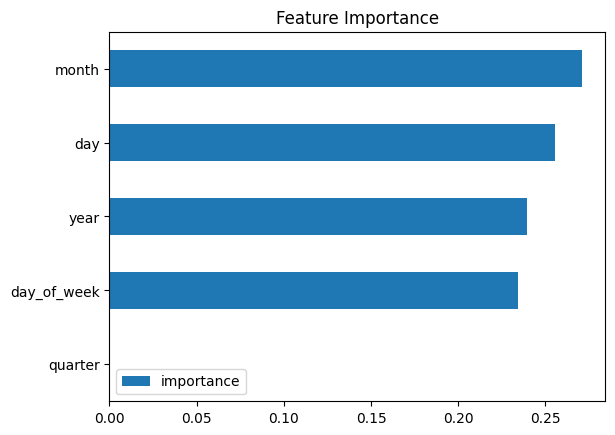

In [ ]:
importance = pd.DataFrame(data=XGB_model.feature_importances_,
             index=XGB_model.get_booster().feature_names,
             columns=['importance'])
importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### Which model is the best for the forecasting?


In [ ]:
# Compare the three models in a table

import pandas as pd

data = {'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
        'MSE': [mean_squared_error(y_test, LR_y_pred), mean_squared_error(y_test, RF_y_pred), mean_squared_error(y_test, XGB_y_pred)],
        'R-squared': [r2_score(y_test, LR_y_pred), r2_score(y_test, RF_y_pred), r2_score(y_test, XGB_y_pred)],
        'RMSE': [np.sqrt(mean_squared_error(y_test, LR_y_pred)), np.sqrt(mean_squared_error(y_test, RF_y_pred)), np.sqrt(mean_squared_error(y_test, XGB_y_pred))]}
df_models = pd.DataFrame(data)
df_models

,Model,MSE,R-squared,RMSE
0,Linear Regression,69.581737,0.000059,8.341567
1,Random Forest,73.056377,-0.049875,8.547302
2,XGBoost,77.786980,-0.117857,8.819693


In [ ]:
# Which model is the best for forecasting?

# Find the model with the lowest MSE, highest R-squared, and lowest RMSE
best_model = df_models.loc[df_models['MSE'].idxmin()]

# Print the best model information
print(f"The best model for forecasting is: {best_model['Model']}")

The best model for forecasting is: Linear Regression


The model selected has:
* The highest R^2, which indicates best goodness of fit
* The lowest square root of the mean of the squared differences between the predicted and actual values

Its predictions are, on average, the closest to the actual sales numbers (lowest MSE and RMSE).
It does the best job of explaining why sales change (highest R^2).

## 2022 forecasting

In [ ]:
X_train.columns

Index(['day_of_week', 'month', 'quarter', 'year', 'day'], dtype='object')

In [ ]:
# Create a DataFrame for 2022 predictions
future_dates = pd.date_range(start='2022-01-01', end='2022-12-31')
future_df = pd.DataFrame({'date': future_dates})
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['month'] = future_df['date'].dt.month
future_df['quarter'] = future_df['date'].dt.quarter
future_df['year'] = future_df['date'].dt.year
future_df['day'] = future_df['date'].dt.day

# Select features for prediction
future_X = future_df[['day_of_week', 'month', 'quarter', 'year', 'day']]

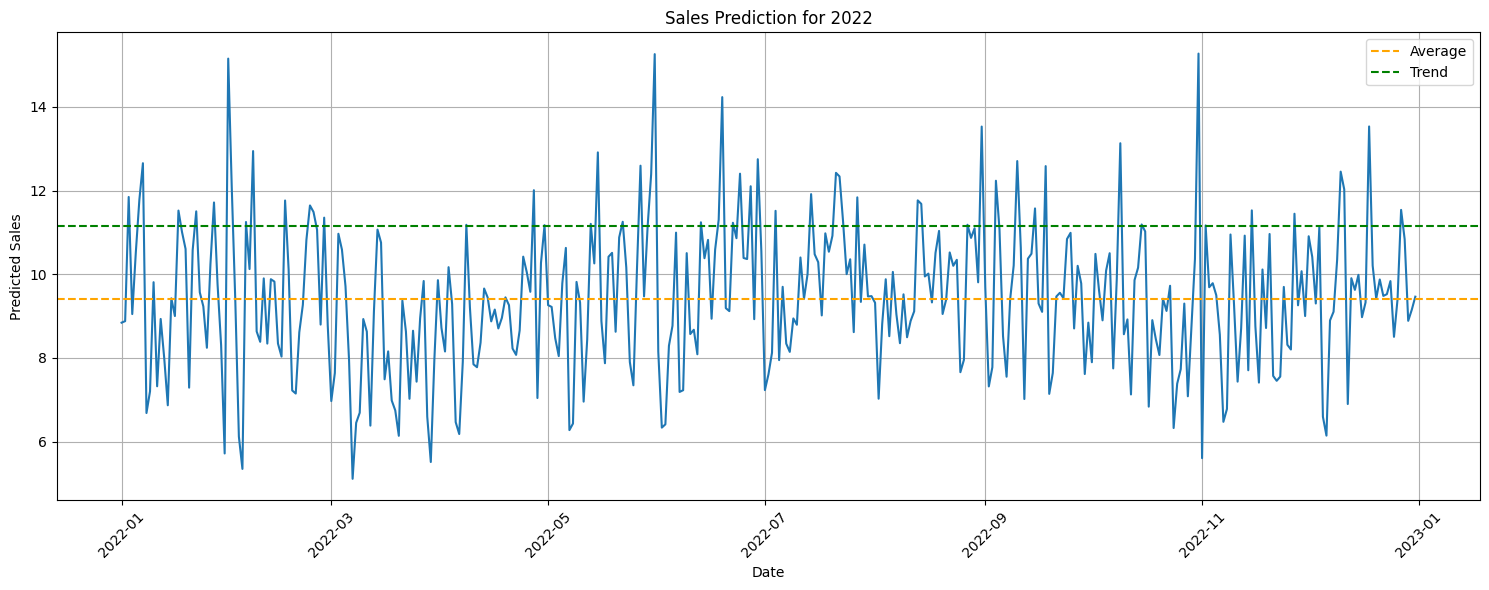

In [ ]:
# Predict using the best model (Random Forest)
future_predictions = RF_model.predict(future_X)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({'date': future_dates, 'predicted_sales': future_predictions})

# Plot predictions
plt.figure(figsize=(15, 6))
plt.plot(predictions_df['date'], predictions_df['predicted_sales'])
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.title('Sales Prediction for 2022')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Plot a dotted orange line for average
plt.axhline(y=predictions_df['predicted_sales'].mean(), color='orange', linestyle='--', label='Average')
# Plot a dotted green line for trend
plt.axhline(y=predictions_df['predicted_sales'].mean() + predictions_df['predicted_sales'].std(), color='g', linestyle='--', label='Trend')
plt.legend()
plt.show()

# Deep Learning

##  Long short-term memory (LSTM) model

##### Fix issue with library version

In [ ]:
#!pip install scikeras --upgrade
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

In [ ]:
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor # Import KerasRegressor from scikeras

In [ ]:
# Create tain and test sets based on previous data
X_train_LSTM = X_train
y_train_LSTM = y_train
X_test_LSTM = X_test
y_test_LSTM = y_test

### Build LSTM model

In [ ]:
# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_LSTM)
X_test_scaled = scaler.transform(X_test_LSTM)

In [ ]:
# Define the LSTM model
def create_lstm_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(X_train_scaled.shape[1], 1))) # Reshape input_shape
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mse')
    return model

In [ ]:
# Create the model
LSTM_model = KerasRegressor(model=create_lstm_model, verbose=0)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
#   'units': [50, 100],  # Number of LSTM units
#   'dropout_rate': [0.2, 0.3],  # Dropout rate
    'optimizer': ['adam', 'rmsprop'],  # Optimizer
    'batch_size': [32, 64], # Batch size
    'epochs': [50, 100]  # Number of epochs
}

In [ ]:
# Perform GridSearchCV
grid = GridSearchCV(estimator=LSTM_model, param_grid=param_grid, cv=3)

In [ ]:
# Perform GridSearchCV
grid = GridSearchCV(estimator=LSTM_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_LSTM)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

In [ ]:
# Print the best parameters and score
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best score: {grid_result.best_score_}")

### Train the model

In [ ]:
# Train the LSTM model with the best hyperparameters
best_LSTM_model = grid_result.best_estimator_
best_LSTM_model.fit(X_train_scaled, y_train_LSTM)

# Make predictions on the test set
LSTM_y_pred = best_LSTM_model.predict(X_test_scaled)

# Evaluate the LSTM model
print('LSTM Model')
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test_LSTM, LSTM_y_pred))
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test_LSTM, LSTM_y_pred))
print('Root mean square error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_test_LSTM, LSTM_y_pred)))

### Make prediction

In [ ]:
# Make predictions
y_pred_LSTM = best_LSTM_model.predict(X_test_LSTM)

# Evaluate the model
print('LSTM Model')
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test_LSTM, y_pred_LSTM))
print('Coefficient of determination (R-squared): %.2f' % r2_score(y_test_LSTM, y_pred_LSTM))
print('Root mean square error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_test_LSTM, y_pred_LSTM)))

### Forecast 2022

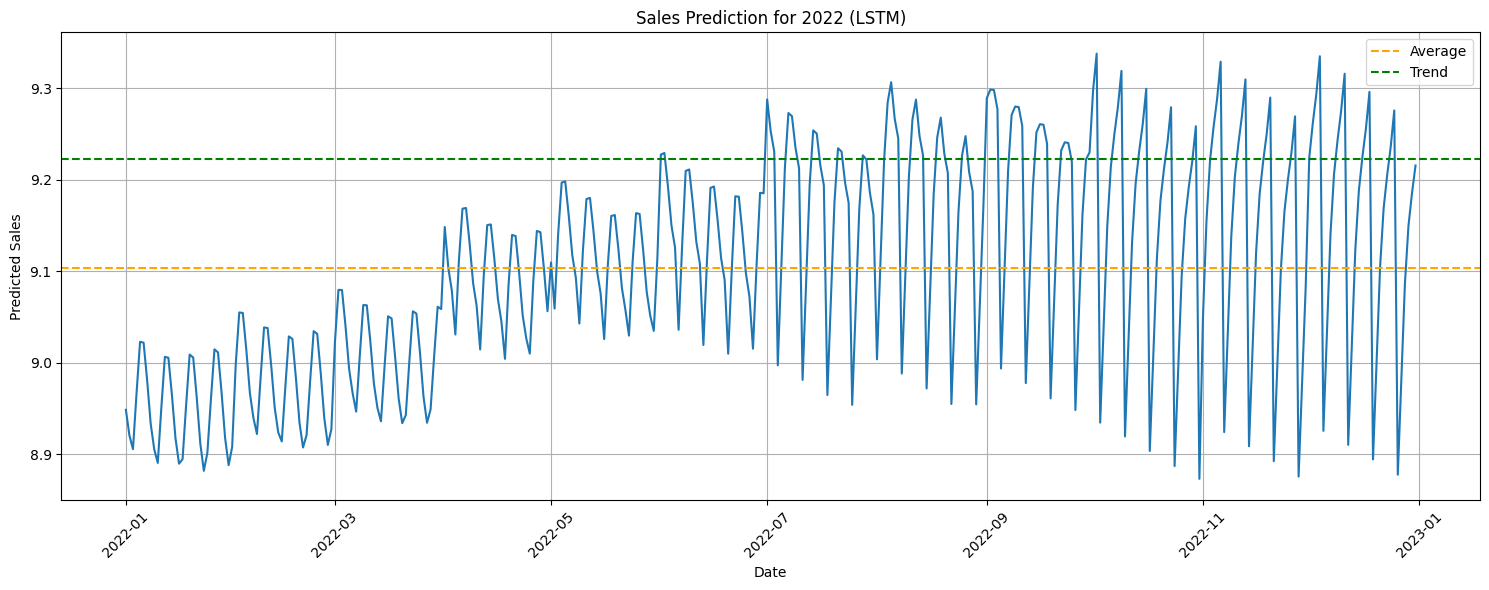

In [ ]:
# Scale the future data using the same scaler used for training
future_X_scaled = scaler.transform(future_X)

# Make prediction
LSTM_future_predictions = best_LSTM_model.predict(future_X_scaled)

# Create a DataFrame for LSTM predictions
LSTM_predictions_df = pd.DataFrame({'date': future_dates, 'predicted_sales': LSTM_future_predictions.flatten()})

# Plot LSTM predictions
plt.figure(figsize=(15, 6))
plt.plot(LSTM_predictions_df['date'], LSTM_predictions_df['predicted_sales'])
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.title('Sales Prediction for 2022 (LSTM)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.axhline(y=LSTM_predictions_df['predicted_sales'].mean(), color='orange', linestyle='--', label='Average')
plt.axhline(y=LSTM_predictions_df['predicted_sales'].mean() + LSTM_predictions_df['predicted_sales'].std(), color='g', linestyle='--', label='Trend')
plt.legend()

plt.show()